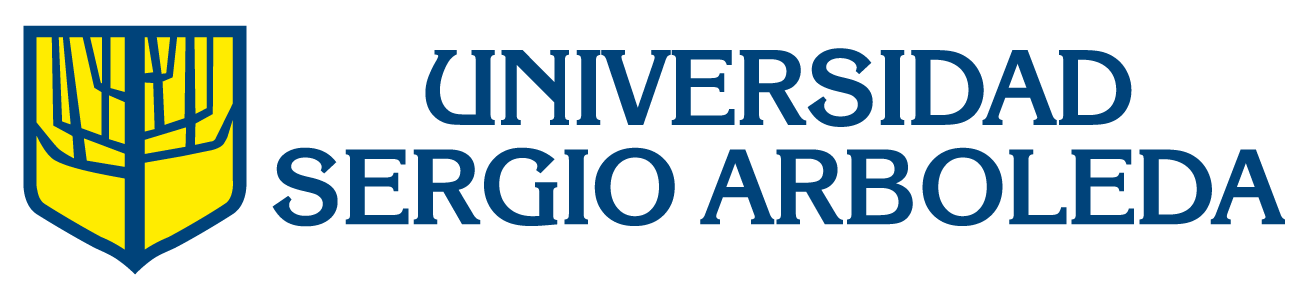


---




# REFERENCIAS:
https://desktop.arcgis.com/es/arcmap/latest/manage-data/raster-and-images/convolution-function.htm


#**Taller C3 - Filtros y Morfología**

**Autores:**  

* Carlos Bermúdez
* Miguel Thomas


**Programa acádemico:**  

* Ciencias de la computación e Inteligencia Artificial

**Materia:**   
* Procesamiento de Imágenes

# __Requerimientos__


Construya un notebook de python y siga las instrucciones a continuación, explique con claridad cada una de sus respuestas y utilice como ejemplos los resultados obtenidos.
## __Problemas__

## __Problema 1__
1. Descargue la imagen BB_63X1.tif
2. Muestre la imagen y sus características
3. Aplique un filtro de convolución con máscaras de unos de diferente tamaño 3x3 y 5x5 (puede utilizar el método kernel de Pillow)
4. Responda a las siguientes preguntas,
  * ¿Cómo la máscara afecta el difuminado y la reducción de ruido?,
  * ¿Como cree que se pueda tener una mejor compensación entre el suavizado y la reducción de ruido?.
5. Aplique un filtro de enfoque la imagen difuminada de 3x3 con una convolución con máscara laplaciana

     0  -1   0

     -1  5  -1

     0  -1   0

  Responda las siguientes preguntas:
  * ¿Esta operación reduce el difuminado?
  * ¿Que resulta de esta operación con el ruido?

6. Escale al imagen para hacer visible el efecto
7. Aplique nuevamente el filtro de enfoque. Responda,
  * ¿qué sucedio con la imagen?


## __Problema 2__

1. Descargue le archivo cameraman-noise.tif
2. Muestre la imagen
3. Realize una convolución con un box filter (lleno de unos) para reducir el ruido
4. Seleccione un tamaño razonable del filtro para compensar el ruido y el suavizado
5. Aplique un filtro mediana con una máscara de 3x3 y compare los resultados con el punto 3. Responda:
  * ¿Cuál aproximación es mas satisfactoria en terminos de calidad de la imagen?


## __Problema 3__

1. Descargue le archivo BB_63x4.tif
2. Muestre la imagen
3. Aplique un filtro de umbralización para que queden en blanco las regiones correspondientes a las células y en negro el fondo de la imagen
4. Explique como removería la indicación de tamaño en la imagen
5. Aplique los filtros que le permiten remover la indicación de tamaño
6. Sobre al imagen umbralizada aplique filtros morfológicos para:      
  * rellenar las áreas con huecos y para suavizar el borde de la imagen.

# __Imports__

In [34]:
import os
import requests
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import cv2

# __Descargar Imágenes__

In [2]:
base_url = 'https://raw.githubusercontent.com/carlosbermudezgalvan/Datasets/main/filters%20and%20morphologies%20images'

image_files = [
    'BB_63x_1.tif', 'BB_63x_4.tif', 'cameraman-noise.tif', 'cameraman-noise2.tif'
]

for file_name in image_files:
    file_url = f'{base_url}/{file_name}'
    response = requests.get(file_url)
    with open(file_name, 'wb') as file:
        file.write(response.content)

archivos_descargados = os.listdir()
print("Archivos descargados:", archivos_descargados)

Archivos descargados: ['.config', 'BB_63x_1.tif', 'cameraman-noise2.tif', 'BB_63x_4.tif', 'cameraman-noise.tif', 'sample_data']


# __Problema 1__

## __Carga de la Imagen y sus Caracteristicas__

In [3]:
imagen = Image.open("/content/BB_63x_1.tif")

-------------------------------------------
Caracteristicas de la imagen: 
-------------------------------------------
Tamaño de la imagen : (1024, 1024)
Modo de la imagen   : L
Formato de la Imagen: TIFF
-------------------------------------------


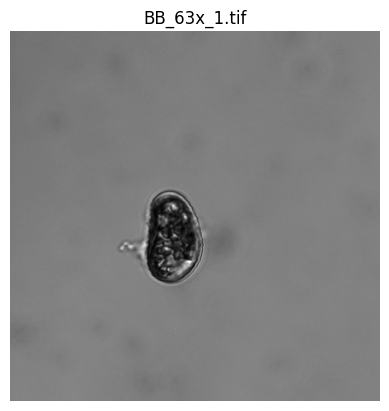

------------------------------------------------


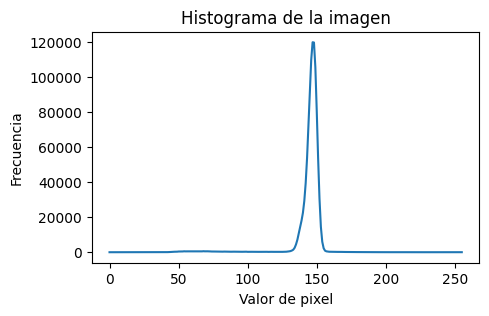

In [9]:
print("-------------------------------------------")
print("Caracteristicas de la imagen: ")
print("-------------------------------------------")
print("Tamaño de la imagen :", imagen.size)
print("Modo de la imagen   :", imagen.mode)
print("Formato de la Imagen:", imagen.format)
print("-------------------------------------------")

# Visualizar Imagen
plt.imshow(imagen, cmap='gray')
plt.title('BB_63x_1.tif')
plt.axis('off')
plt.show()

print("------------------------------------------------")

# Histograma
histogram = imagen.histogram()
plt.figure(figsize=(5,3))
plt.title('Histograma de la imagen')
plt.xlabel('Valor de pixel')
plt.ylabel('Frecuencia')
plt.plot(histogram)
plt.show()

## __Filtro de Convolución con Mascaras de tamaño 3x3 y 5x5 con el método Kernel__

In [10]:
# Definir mascaras
mascara_3x3 = [1/9] * 9  # 3x3, la suma de todos los valores es 9
mascara_5x5 = [1/25] * 25

# Aplicar filtro
filtro_3x3 = imagen.filter(ImageFilter.Kernel((3, 3), mascara_3x3, scale=1))
filtro_5x5 = imagen.filter(ImageFilter.Kernel((5, 5), mascara_5x5, scale=1))

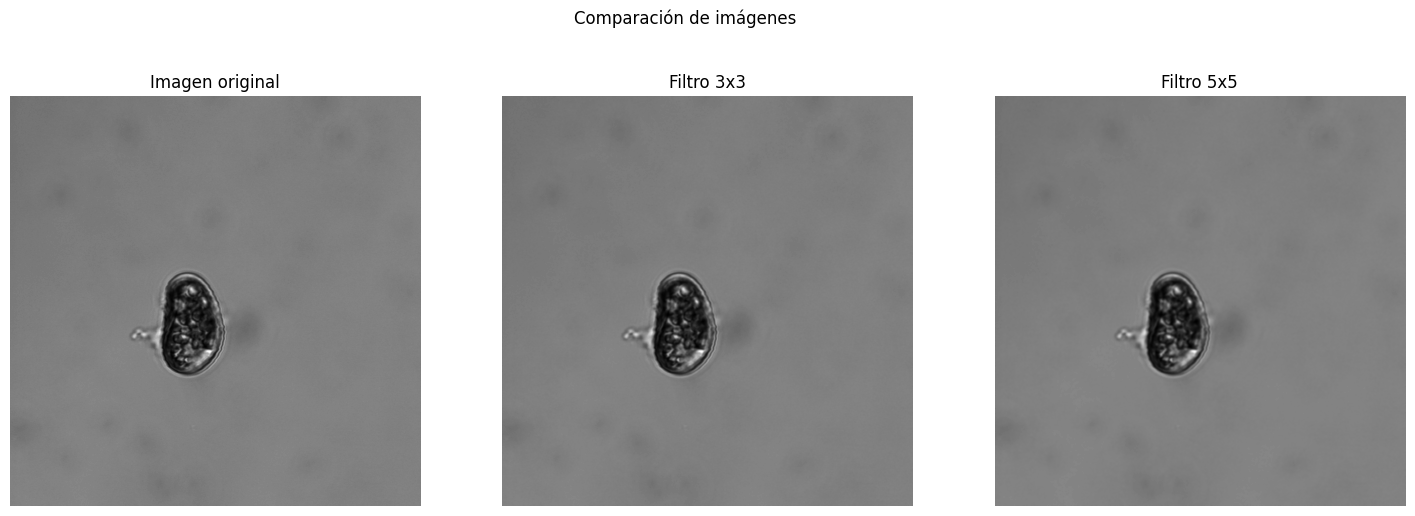

In [15]:
# Visualizar imagenes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(imagen, cmap='gray')
axes[1].imshow(filtro_3x3, cmap='gray')
axes[2].imshow(filtro_5x5, cmap='gray')

fig.suptitle('Comparación de imágenes')

axes[0].set_title('Imagen original')
axes[1].set_title('Filtro 3x3')
axes[2].set_title('Filtro 5x5')

for ax in axes:
  ax.axis('off')

plt.show()

## __Desarrollo Preguntas__

### __¿Cómo la máscara afecta el difuminado y la reducción de ruido?__

Rta:

Respecto al difuminado, la mascara 3x3 suaviza la imagen, pero el efecto de difuminado es relativamente pequeño. Los detalles y bordes se suavizan ligeramente.

Ahora, la mascara 5x5 Suaviza la imagen más significativamente que el kernel 3x3. Sin embargo, los detalles finos y los bordes se difuminan más, produciendo una imagen más borrosa.

Respecto al ruido, la mascara 3x3 ayudó a reducir el ruido al promediar los valores de los píxeles en una ventana más pequeña. Sin embargo, la imagen no presentaba ruido severo.

La mascara 5x5  Es más efectiva para reducir el ruido porque promedia los valores de los píxeles en una ventana más grande. Sin embargo,  causa un mayor difuminado, lo que resulta en una pérdida de detalles y nitidez.



### __¿Como cree que se pueda tener una mejor compensación entre el suavizado y la reducción de ruido?__

Rta:

Es recomendable utilizar filtros adaptativos (bilateral, o Gaussiano adaptativo por ejemplo) que ajusten dinámicamente el tamaño del kernel según las características locales de la imagen.

Para lograr una mejor compensación entre suavizado y reducción de ruido, se puede usar un filtro de mediana que reduce el ruido mientras mantiene los bordes nítidos, o combinar un filtro de suavizado con un filtro de enfoque para restaurar la nitidez después de la reducción de ruido.



##Filtro de Enfoque a Imagen de 3x3

In [18]:
filtro_enfoque = filtro_3x3.filter(ImageFilter.Kernel((3, 3), [0, -1, 0, -1, 5, -1, 0, -1, 0], scale=1))

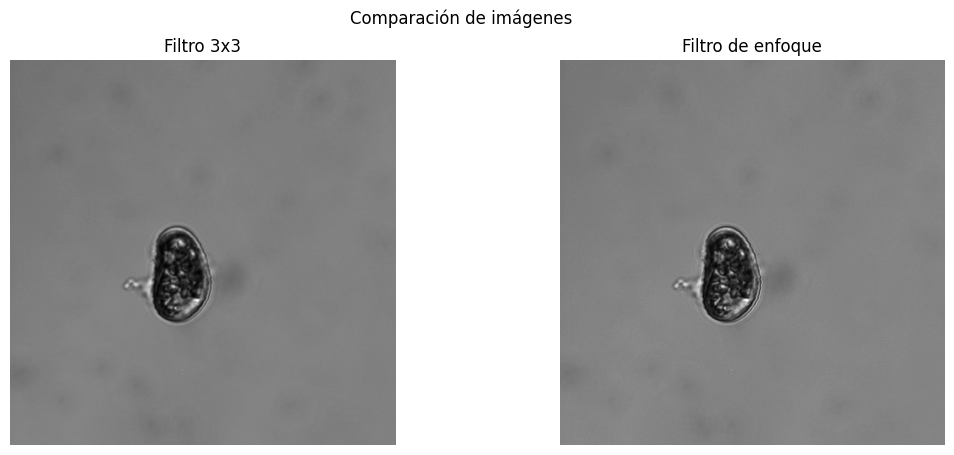

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].imshow(filtro_3x3, cmap='gray')
axes[1].imshow(filtro_enfoque,cmap='gray')

fig.suptitle('Comparación de imágenes')

axes[0].set_title('Filtro 3x3')
axes[1].set_title('Filtro de enfoque')

for ax in axes:
  ax.axis('off')

plt.show()

## __Desarrollo Preguntas__

### __¿Esta operación reduce el difuminado?__

Rta:

La operación de enfoque con la máscara

 0, -1, 0,

 -1, 5, -1,

  0, -1, 0
  
  no reduce el difuminado, sino que enfatiza los bordes y detalles, lo que puede dar la impresión de mayor nitidez pero no reduce directamente el efecto de difuminado en la imagen.

### __¿Que resulta de esta operación con el ruido?__

Rta:

 Al aplicarl el filtro, se resalta los bordes y detalles en la imagen al aumentar el contraste entre píxeles vecinos y el píxel central. Esto hace que cualquier ruido presente en la imagen, especialmente en áreas de alto contraste, se vuelva más visible debido a la amplificación de los detalles. Por lo tanto, la operación de enfoque hace que el ruido sea un poco más evidente en la imagen resultante.

## __Imagen Escalada__

In [29]:
imagen_escalada = filtro_enfoque.resize((512, 512))

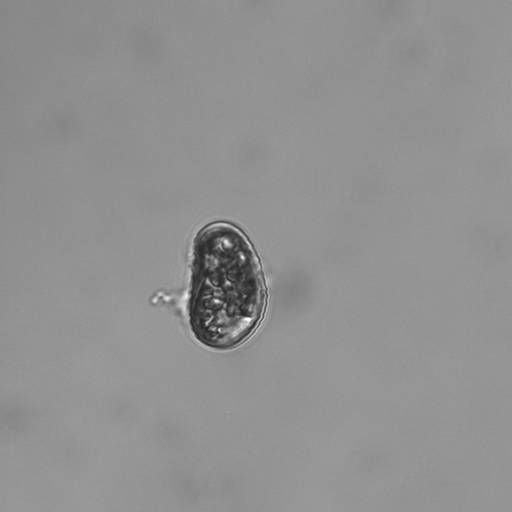

In [30]:
imagen_escalada

##Aplicación del Enfoque por segunda Vez

In [31]:
filtro_enfoque_2 = imagen_escalada.filter(ImageFilter.Kernel((3, 3), [0, -1, 0, -1, 5, -1, 0, -1, 0], scale=1))

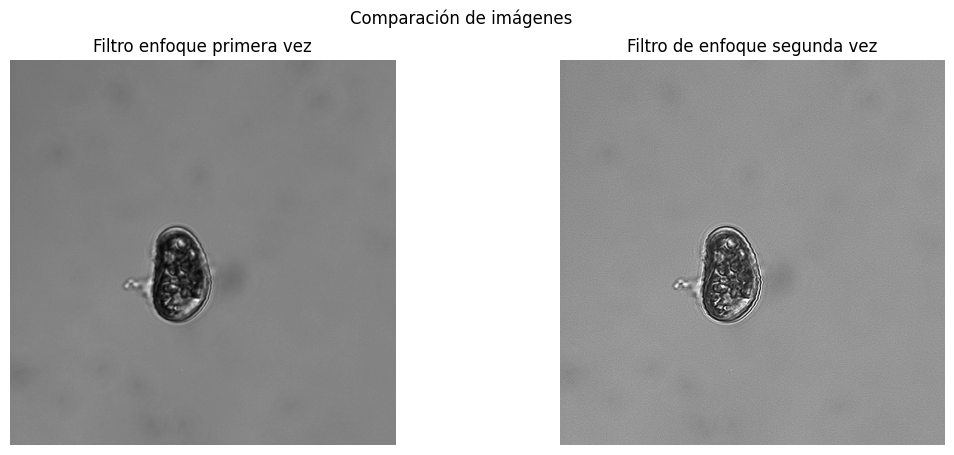

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].imshow(filtro_enfoque, cmap='gray')
axes[1].imshow(filtro_enfoque_2,cmap='gray')

fig.suptitle('Comparación de imágenes')

axes[0].set_title('Filtro enfoque primera vez')
axes[1].set_title('Filtro de enfoque segunda vez')

for ax in axes:
  ax.axis('off')

plt.show()

## __Desarrollo Pregunta__

### __¿Qué sucedio con la imagen?__

Rta:

Los efectos del filtro de enfoque son más evidentes, se ven bordes mas finos (se observan más resltados y delimitados) al igual que los detalles de la imagen, a pesar de la pérdida de información al reescalarla. Tambien se observa la imagen mas nítida y clara, con un aumento en el contraste. Esto debido a que resalta las diferencias de intensidad entre los píxeles vecinos y el píxel central

#Problema 2

##Cargar y Mostrar la Imagen

In [36]:
img = cv2.imread('cameraman-noise.tif', cv2.IMREAD_GRAYSCALE)

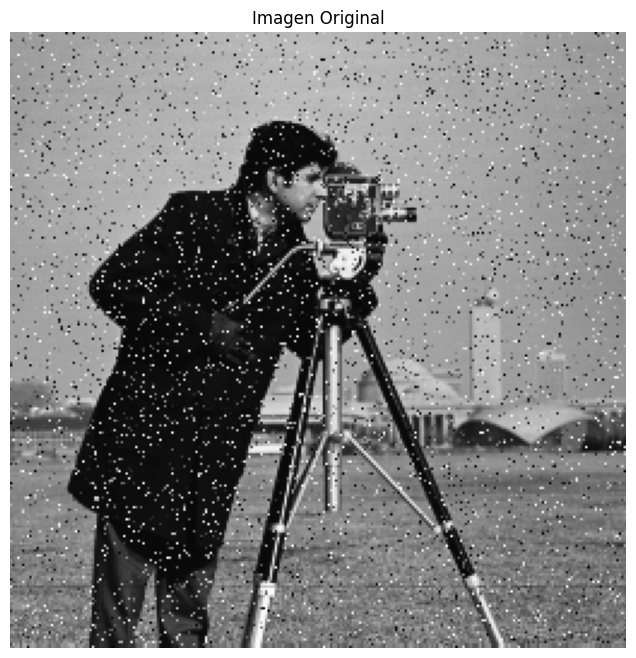

In [37]:
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

## __Aplicación de un Tamaño del filtro: 5x5 lleno de unos para compensar el ruido y el Suavizado__

In [39]:
# Filtro 5x5 lleno de unos
box_filter = np.ones((5, 5), np.float32) / 25

## __Desarrollo de un convolución con Box Filter para lograr reducir el Ruido__

In [40]:
img_box_filtered = cv2.filter2D(img, -1, box_filter)

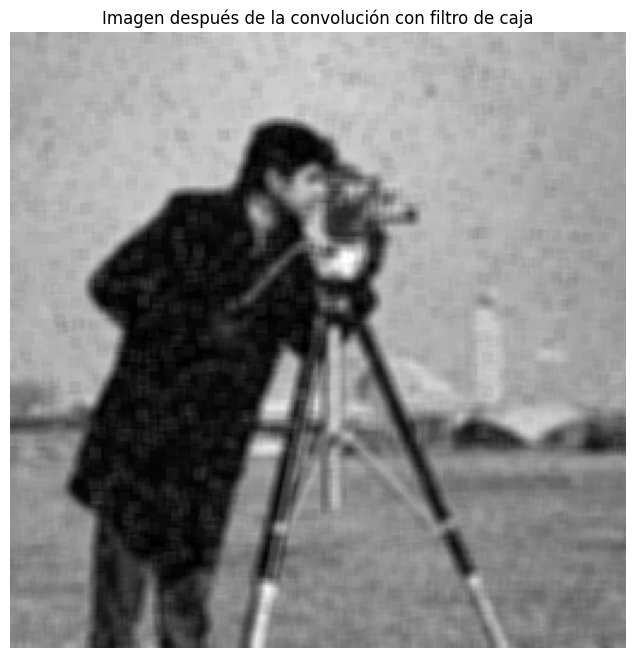

In [41]:
plt.figure(figsize=(8, 8))
plt.imshow(img_box_filtered, cmap='gray')
plt.title('Imagen después de la convolución con filtro de caja')
plt.axis('off')
plt.show()

##Aplicación del Fiultro Mediana con una Máscara de 3x3

In [42]:
img_median_filtered = cv2.medianBlur(img, 3)

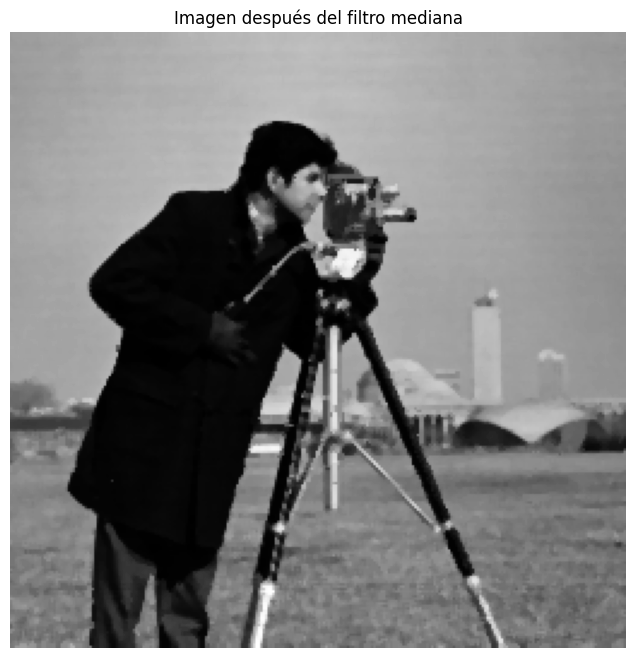

In [43]:
plt.figure(figsize=(8, 8))
plt.imshow(img_median_filtered, cmap='gray')
plt.title('Imagen después del filtro mediana')
plt.axis('off')
plt.show()

##Comparación de la Imagen con Filtro Mediana y Filtro de Caja

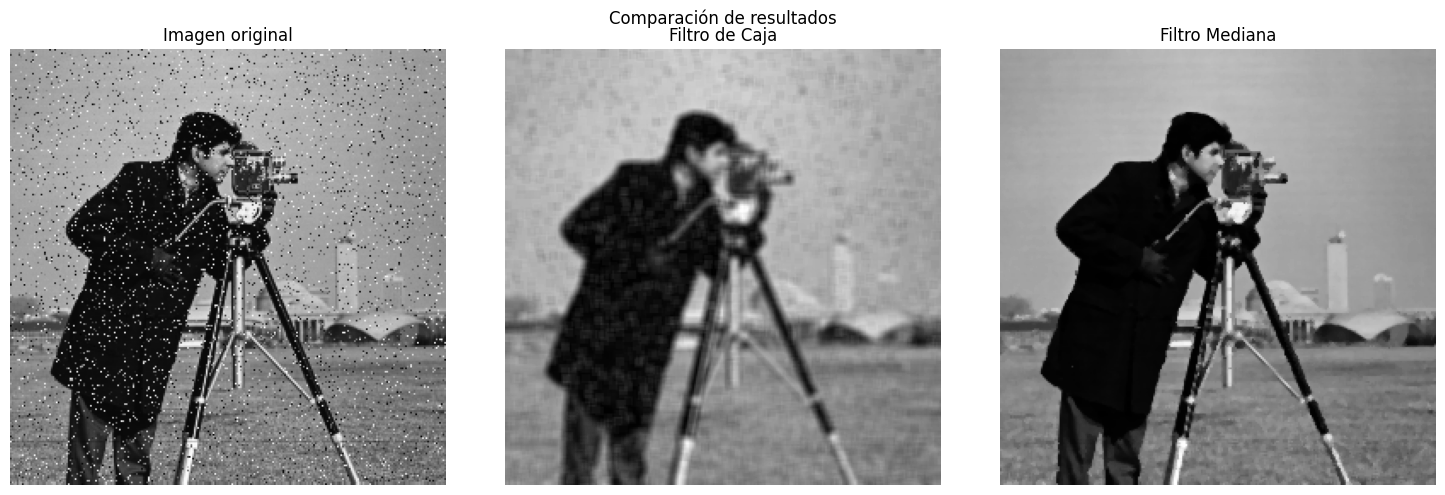

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Imagen original')
axes[0].axis('off')

axes[1].imshow(img_box_filtered, cmap='gray')
axes[1].set_title('Filtro de Caja')
axes[1].axis('off')

axes[2].imshow(img_median_filtered, cmap='gray')
axes[2].set_title('Filtro Mediana')
axes[2].axis('off')

fig.suptitle('Comparación de resultados')

plt.tight_layout()

plt.show()

## __Desarrollo Pregunta__

### __¿Cuál aproximación es mas satisfactoria en terminos de calidad de la imagen?__

Rta:




Filtro de caja:

* Reduce el ruido.

* Genera imagen borrosa.

Filtro mediana:

* Elimina el ruido.

* Mantiene la nitidez de la imagen.



En el caso del filtro de la caja tiende a suavizar la imagen más uniformemente, lo que puede ser preferible para ciertas aplicaciones. Sin embargo, el filtro mediana tiende a preservar mejor los bordes y detalles finos en la imagen, lo que puede ser preferible en otros casos. En general, para reducir el ruido mientras se preservan los detalles, el filtro mediana tiende a ser más efectivo en comparación con el filtro de caja. Por lo tanto, en términos de calidad de imagen, la aproximación más satisfactoria es  el filtro mediana.

# __Problema 3__

## __Carga y Muestra de la Imagen__

In [45]:
img = cv2.imread('BB_63x_4.tif', cv2.IMREAD_GRAYSCALE)

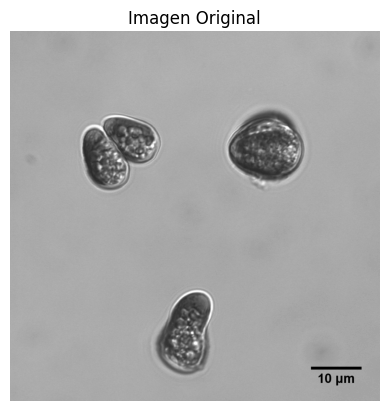

In [47]:
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

## __Aplicación de Filtro de Umbralización__

In [56]:
_, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [57]:
thresh_img = cv2.bitwise_not(thresh_img)

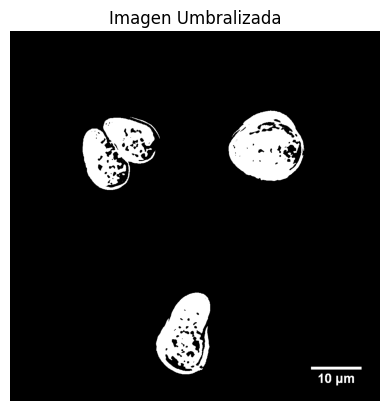

In [58]:
plt.imshow(thresh_img, cmap='gray')
plt.title('Imagen Umbralizada')
plt.axis('off')
plt.show()

## __Explicación de Removación de Indicación de Tamaño en la Imagen__

Rta:

 Se podría emplear técnicas de procesamiento de imágenes, como eliminar las líneas o detectar y borrar el texto, para remover la indicación de tamaño en la imagen. Una opción específica sería aplicar un filtro de mediana para eliminar el texto de manera efectiva.

In [59]:
smoothed_img = cv2.medianBlur(img, 5)

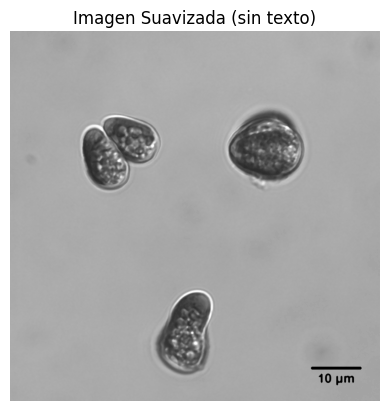

In [60]:
plt.imshow(smoothed_img, cmap='gray')
plt.title('Imagen Suavizada (sin texto)')
plt.axis('off')
plt.show()

In [63]:
smoothed_img_2 = cv2.medianBlur(thresh_img, 5)

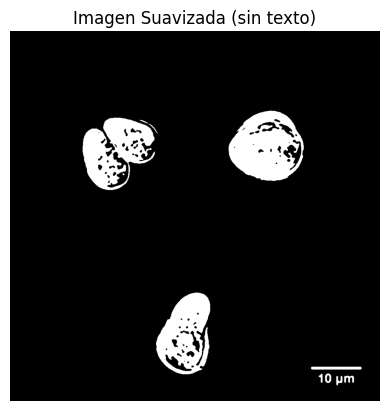

In [65]:
plt.imshow(smoothed_img_2, cmap='gray')
plt.title('Imagen Suavizada (sin texto)')
plt.axis('off')
plt.show()

## __Aplicación de Filtros Morfológicos (Relleno de Huecos y Suavización del Borde)__

In [61]:
# Rellenar áreas con huecos (closing)
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

# Suavizar el borde de la imagen (erosión y dilatación)
kernel = np.ones((3,3),np.uint8)
smoothed_edge = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

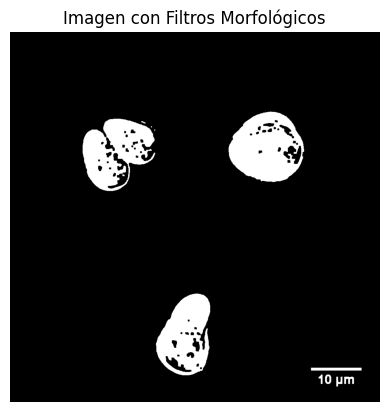

In [62]:
plt.imshow(smoothed_edge, cmap='gray')
plt.title('Imagen con Filtros Morfológicos')
plt.axis('off')
plt.show()

No se logró la eliminación de la indicación de tamaño de la imagen,